<img src="https://margaritaimpresora.files.wordpress.com/2013/11/di-logo-sanjoaquin.jpg" title="USM" width="70%" height="70%" style="float: left;"/>

<br><br><br><br><br><br><br><br><br><br>
_____

<center>
   <h2>Tarea 1: Implementar AWE usando Skip-grams</h2>
   <h2>Recuperación de información </h2>
   <h4>Profesor: Marcelo Mendoza</h4>
   <h4>Estudiante: Fernanda Weiss</h4>
</center>

### Datos:
* topics.51-100: Campo "title" serán las consultas.
* wsj2.xml: Colección de evaluación, contiene los documentos, el corpus, sobre los que se harán las queries.
* script.py: Parsea el corpus, wsj2.xml
* qrels.51-100: Ground truth de los docs relevantes (1) y los no (0)

    Luego de ejecuta *script.py* se tiene una carpeta *corpus* que tiene 10.163 documentos.

## Pasos a seguir:
0. Leer documentos
1. Pre-procesar el texto
2. Crear vocabulario
3. Reconstruir documentos
4. Implementar AWE
5. Recuperar documentos con AWE
6. Rankear con BM25
7. Obtener métricas: precision and recall

In [30]:
import numpy as np

import matplotlib.pyplot as plt

import os

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import FreqDist

from keras.preprocessing.text import text_to_word_sequence

import gensim

### 1) Leer documentos

In [2]:
docs_dir = os.listdir("corpus/")
docs = {}
for file in docs_dir:
    docs[file.title()] = "".join(open("corpus/"+file).readlines())

In [3]:
texts = list(docs.values())

In [4]:
len(texts)

10163

### 2) Pre-procesar el texto

* **Tokenize:**
    * NLTK
    * Keras
    * Spacy

* **Remove stopwords:**
    * NLTK

* **Lower case**

* **Remove long words less 2**

* **Lemmatization - stemming**



In [47]:
print(texts[1])

Who's News:
   Independent Bank Corp.



Using NLTK:

In [48]:
#Tokenizar
word_tokenize(texts[1])

['Who', "'s", 'News', ':', 'Independent', 'Bank', 'Corp', '.']

In [5]:
texts_nltk = texts.copy()
for i in range(len(texts)):
    texts_nltk[i] = [token.lower() for token in word_tokenize(texts_nltk[i]) ] 


In [6]:
def gen_dist(texts):
    word_dist = FreqDist()
    for s in texts:
        word_dist.update(s)
    return word_dist

In [7]:
def plt_zipf(dist):
    plt.figure(figsize=(12,6))
    dist.plot(50)

In [8]:
dist_nltk = gen_dist(texts_nltk)

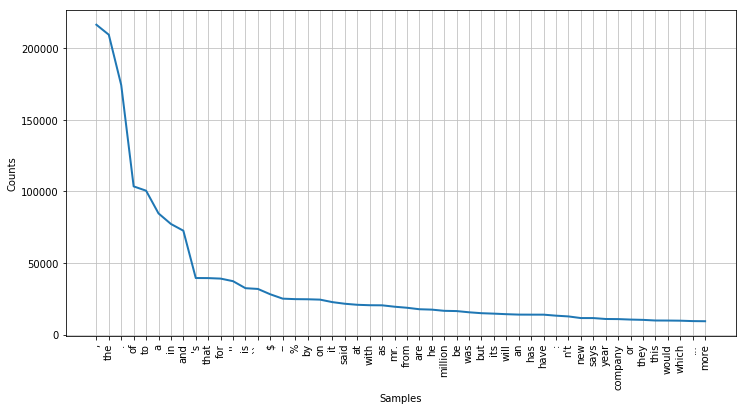

In [9]:
plt_zipf(dist_nltk)

Using Keras:

In [89]:
print(texts[0])

LTV Loss Narrowed
   In Fourth Quarter
   As Sales Slid 5.9%
For the quarter, LTV's steel operations had a loss of $54
million, wider than the 1990 period's $11.1 million operating
loss. Sales dropped 8.3% to $850 million.
   The company's energy business posted a quarterly operating
loss of $16.3 million, after charges related to excess and
slow-moving inventory. It had operating income of $1.4
million a year earlier. Sales fell 14% to $74 million.
   Aerospace and defense businesses, which are being sold to
raise cash for the company's reorganization, reported
operating income of $14 million, up from $8.8 million a year
earlier. Sales dipped 1.2% to $592 million.
   The Bush administration's plan to limit production of the
company's B-2 Stealth bomber to 20 aircraft will "have a
significant impact" on operating results, LTV said, but said
it still has two years of production left even if the plan is
adopted. The company this week said it had agreed to sell its
aircraft and missiles b

In [87]:
text_to_word_sequence(texts[0])

['ltv',
 'loss',
 'narrowed',
 'in',
 'fourth',
 'quarter',
 'as',
 'sales',
 'slid',
 '5',
 '9',
 'for',
 'the',
 'quarter',
 "ltv's",
 'steel',
 'operations',
 'had',
 'a',
 'loss',
 'of',
 '54',
 'million',
 'wider',
 'than',
 'the',
 '1990',
 "period's",
 '11',
 '1',
 'million',
 'operating',
 'loss',
 'sales',
 'dropped',
 '8',
 '3',
 'to',
 '850',
 'million',
 'the',
 "company's",
 'energy',
 'business',
 'posted',
 'a',
 'quarterly',
 'operating',
 'loss',
 'of',
 '16',
 '3',
 'million',
 'after',
 'charges',
 'related',
 'to',
 'excess',
 'and',
 'slow',
 'moving',
 'inventory',
 'it',
 'had',
 'operating',
 'income',
 'of',
 '1',
 '4',
 'million',
 'a',
 'year',
 'earlier',
 'sales',
 'fell',
 '14',
 'to',
 '74',
 'million',
 'aerospace',
 'and',
 'defense',
 'businesses',
 'which',
 'are',
 'being',
 'sold',
 'to',
 'raise',
 'cash',
 'for',
 'the',
 "company's",
 'reorganization',
 'reported',
 'operating',
 'income',
 'of',
 '14',
 'million',
 'up',
 'from',
 '8',
 '8',
 'm

In [88]:
texts_keras = texts.copy()
for i in range(len(texts)):
    texts_keras[i] = text_to_word_sequence(texts_keras[i])

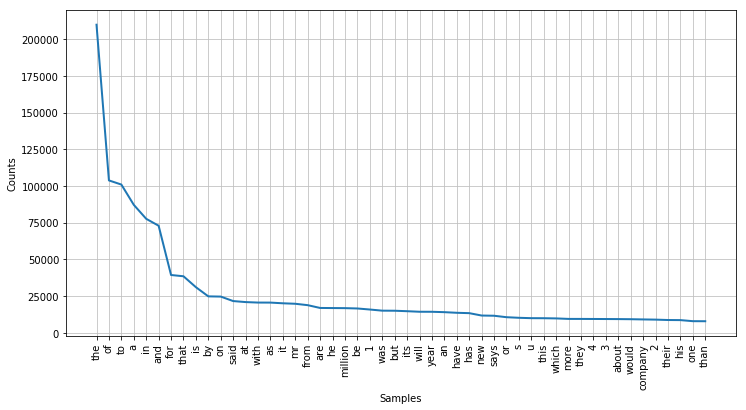

In [90]:
dist_keras = gen_dist(texts_keras)
plt_zipf(dist_keras)

Using Keras option 2

In [91]:
from keras.preprocessing.text import Tokenizer
t = Tokenizer()

t.fit_on_texts(texts)

In [99]:
t.word_counts

OrderedDict([('ltv', 100),
             ('loss', 2079),
             ('narrowed', 95),
             ('in', 77586),
             ('fourth', 1787),
             ('quarter', 3914),
             ('as', 20511),
             ('sales', 4627),
             ('slid', 99),
             ('5', 7595),
             ('9', 3863),
             ('for', 39312),
             ('the', 209822),
             ("ltv's", 25),
             ('steel', 582),
             ('operations', 1453),
             ('had', 6868),
             ('a', 87117),
             ('of', 103747),
             ('54', 394),
             ('million', 16734),
             ('wider', 101),
             ('than', 7819),
             ('1990', 2780),
             ("period's", 12),
             ('11', 2412),
             ('1', 15796),
             ('operating', 1230),
             ('dropped', 709),
             ('8', 7645),
             ('3', 9317),
             ('to', 100930),
             ('850', 68),
             ("company's", 2206),
             

In [102]:
type(t.word_counts)

collections.OrderedDict

In [ ]:
from operator import itemgetter
plt.plot(sorted(t.word_counts.items(), key = itemgetter(1)))

In [10]:
other_stopwords = ['...','.','!',' ',';',',','``',"''",'--']
stoplist = np.concatenate((stopwords.words('english'),other_stopwords),axis=0)

stemmer = SnowballStemmer("english")

In [1]:
for i in range(len(texts_nltk)):
    texts_nltk[i] = [token for token in texts_nltk[i] if token not in stoplist]
    texts_nltk[i] = [token for token in texts_nltk[i] if not token.isalpha()]
    texts_nltk[i] = [token for token in texts_nltk[i] if len(token)>2]
    texts_nltk[i] = [stemmer.stem(token) for token in texts_nltk[i]]

NameError: name 'texts_nltk' is not defined

In [61]:
texts_nltk[3][-1].isdigit()

True

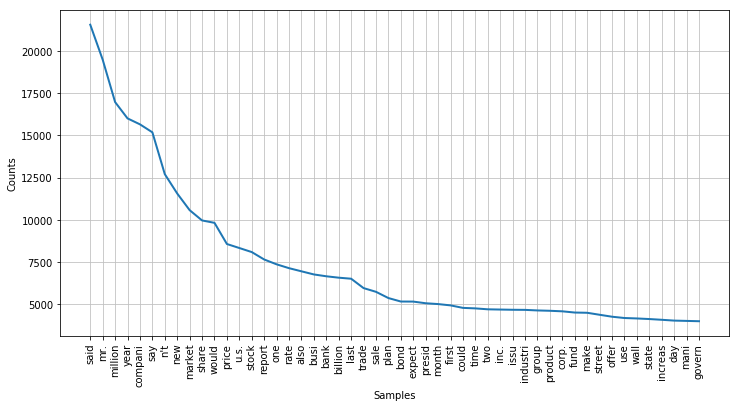

In [12]:
dist_nltk2 = gen_dist(texts_nltk)
plt_zipf(dist_nltk2)

In [16]:
texts[3]

'Bowater to Acquire\n   2 Packaging Firms\n   Via Rights Issue\n   ----\n   Special to The Wall Street Journal\nBowater Chairman Norman Ireland said that the moves "are\nan important step forward in our increasing focus on health\ncare packaging and provide Bowater with a meaningful presence\nin continental Europe."\n   The company also reported a 0.4% slip in its 1991 pretax\nprofit, to #112.7 million. But the dividend was raised 4.8%\nto 22 pence (39 cents) a share from 21 pence. Revenue slipped\n5.3% to #1.21 billion from #1.27 billion.\n   The acquisitions will boost sales by Bowater\'s\npharmaceutical, medical and personal-care operations to about\n#370 million from #150 million, the company said.\n   DRG specializes in flexible and rigid plastic packaging\nfor the medical and food industries. It had operating profit\nof #18.7 million in 1991 on sales of #220.8 million.\n   Cope Allman specializes in rigid plastic packaging for\ncosmetics, pharmaceutical and personal products. It 

In [17]:
texts_nltk[3]

['bowat',
 'acquir',
 'packag',
 'firm',
 'via',
 'right',
 'issu',
 'special',
 'wall',
 'street',
 'journal',
 'bowat',
 'chairman',
 'norman',
 'ireland',
 'said',
 'move',
 'import',
 'step',
 'forward',
 'increas',
 'focus',
 'health',
 'care',
 'packag',
 'provid',
 'bowat',
 'meaning',
 'presenc',
 'continent',
 'europ',
 'compani',
 'also',
 'report',
 '0.4',
 'slip',
 '1991',
 'pretax',
 'profit',
 '112.7',
 'million',
 'dividend',
 'rais',
 '4.8',
 'penc',
 'cent',
 'share',
 'penc',
 'revenu',
 'slip',
 '5.3',
 '1.21',
 'billion',
 '1.27',
 'billion',
 'acquisit',
 'boost',
 'sale',
 'bowat',
 'pharmaceut',
 'medic',
 'personal-car',
 'oper',
 '370',
 'million',
 '150',
 'million',
 'compani',
 'said',
 'drg',
 'special',
 'flexibl',
 'rigid',
 'plastic',
 'packag',
 'medic',
 'food',
 'industri',
 'oper',
 'profit',
 '18.7',
 'million',
 '1991',
 'sale',
 '220.8',
 'million',
 'cope',
 'allman',
 'special',
 'rigid',
 'plastic',
 'packag',
 'cosmet',
 'pharmaceut',
 'person

In [15]:
from spacy.tokenizer import Tokenizer
import spacy
nlp = spacy.load('en_core_web_lg')
tokenizer = Tokenizer(nlp.vocab)

In [20]:
asd = tokenizer(texts[0])

In [41]:
asdsad = nlp(texts[0])

In [44]:
for token in asd:
    print('"' + token.text + '"')

"LTV"
"Loss"
"Narrowed"
"
   "
"In"
"Fourth"
"Quarter"
"
   "
"As"
"Sales"
"Slid"
"5.9%"
"
"
"For"
"the"
"quarter,"
"LTV's"
"steel"
"operations"
"had"
"a"
"loss"
"of"
"$54"
"
"
"million,"
"wider"
"than"
"the"
"1990"
"period's"
"$11.1"
"million"
"operating"
"
"
"loss."
"Sales"
"dropped"
"8.3%"
"to"
"$850"
"million."
"
   "
"The"
"company's"
"energy"
"business"
"posted"
"a"
"quarterly"
"operating"
"
"
"loss"
"of"
"$16.3"
"million,"
"after"
"charges"
"related"
"to"
"excess"
"and"
"
"
"slow-moving"
"inventory."
"It"
"had"
"operating"
"income"
"of"
"$1.4"
"
"
"million"
"a"
"year"
"earlier."
"Sales"
"fell"
"14%"
"to"
"$74"
"million."
"
   "
"Aerospace"
"and"
"defense"
"businesses,"
"which"
"are"
"being"
"sold"
"to"
"
"
"raise"
"cash"
"for"
"the"
"company's"
"reorganization,"
"reported"
"
"
"operating"
"income"
"of"
"$14"
"million,"
"up"
"from"
"$8.8"
"million"
"a"
"year"
"
"
"earlier."
"Sales"
"dipped"
"1.2%"
"to"
"$592"
"million."
"
   "
"The"
"Bush"
"administration's"
"plan"
"to"
"limit"
"

### 3) Crear vocabulario

In [55]:
vocab = set()
for text in texts_nltk:
    for word in text:
        vocab.add(word)

word2id = {w: i for i, w in enumerate(vocab)}
id2word = {i: w for i, w in enumerate(vocab)}
texts_ids = [[word2id[word] for word in text] for text in texts_nltk]

In [53]:
len(texts_nltk[0])

910

In [56]:
len(texts_ids[0])

910

### 4) Skip-grams

In [20]:
def skip_grams(sentences, window, vocab_size, nb_negative_samples=5.):

    import keras.preprocessing.sequence as seq

    def sg(sentence):
        return seq.skipgrams(sentence, vocab_size, window_size=window, negative_samples=nb_negative_samples)

    couples = []
    labels = []

    for cpl, lbl in map(sg, sentences):
        couples.extend(cpl)
        labels.extend(lbl)
        
    return np.asarray(couples), np.asarray(labels)
    

In [22]:
window_size = 2
vocab_size = len(word2id)
negative_samples = 5
couples, labels = skip_grams(texts_nltk[:3], window_size, vocab_size, negative_samples)

In [28]:
(couples[:100])

array([['foreign', '19550'],
       ['labor', 'union'],
       ['parti', '64855'],
       ['concur', '29987'],
       ['want', '57169'],
       ['holocaust', '64016'],
       ['turn', '68203'],
       ['help', '69589'],
       ['rate', '5099'],
       ['sympath', '1969'],
       ['danger', 'men'],
       ['correspond', 'mond'],
       ['among', '68277'],
       ['front', '65047'],
       ['turn', '35331'],
       ['front', '60671'],
       ['job', '50846'],
       ['white', 'hair'],
       ['famili', '46863'],
       ['foreign', 'well'],
       ['truncheon', '36425'],
       ['car', 'mr.'],
       ['one-third', '44347'],
       ['unlik', '39627'],
       ['report', '44890'],
       ['launch', '29987'],
       ['mr.', '47877'],
       ['movement', '63626'],
       ['propos', '6288'],
       ['line', '11886'],
       ['construct', '64044'],
       ['bath', '53983'],
       ['front', '37424'],
       ['newslett', '32972'],
       ['carri', 'boat'],
       ['need', '72653'],
       ['class

In [29]:
labels

array([0, 1, 0, ..., 1, 0, 0])